# Problem statement

Expanding a business internationally can be complex and there are many elements that can be considered. The global sports clothes market is highly competitive, with numerous brands appearing in each market and growing at a steady rate. The market is driven by factors such as increases in health awareness, costs of living, quality of life, purchasing power, etc.

Failure to address these issues appropriately may result in significant financial losses and brand reputation damage, hindering the capacity to reach corporate development ambitions.

The following analytic report will target developing countries outside of Europe.

## Problem 1: Identify Top Developing Countries by Purchasing Power

A country's purchasing power refers to its capacity to acquire products and services in comparison to other countries. For enterprises wishing to grow overseas, developing countries with strong purchasing power may provide a major market potential.

## Problem 2: Identify Top Developing Countries by Quality of Life

Developing countries with a good standard of living may recruit a bright and diversified workforce while improving brand reputation and advertising a healthy lifestyle. Furthermore, such nations frequently have robust regulatory regimes that may offer firms with stability and predictability.

## Problem 3: Relations between Health Care and Quality of Living/Cost of Living
Recognizing the connection between health care and quality of life allows policymakers and businesses to identify areas where changes may be made to improve individuals' and communities' well-being. Regarding the relation between health care and cost of living, businesses can identify ways to adjust their prices to improve access to affordable products relating to health promotion.

# Results

## Problem 1
From the analysis, it has shown that South Africa has the highest purchasing power followed by Taiwan, China, India and several other countries. Expanding business in these countries will most likely grow substantially due to the facts that people can afford to spend more on goods and services with lower financial restraint. 

## Problem 2
Taiwan appears to have the best quality of life as well as highest cost of living. However, they are also top 2 developing country that has high purchasing power. Choosing Taiwan to expand sport clothes business will not only help generate high revenues but also create brand reputation in such a high standard of life environment. 

## Problem 3
Once again, Taiwan has the highest health care index out of all countries. With high purchasing power, high cost of living, good quality of life, and good health care system has concluded that Taiwan meets all the expectations for an overseas enterprise a desired market to expand and grow. 

# Assumptions
1. This analysis targets developing markets that are appealing for sportswear firms wishing to expand their operations for a variety of reasons. An increasing and younger population engaged in sports, rising earnings and growing middle class, and decreased labor costs are among them. Companies that target developing nations can leverage on these opportunities and position themselves as industry leaders, perhaps acquiring a greater market share.

2. The analysis focuses on purchasing power, quality of life, cost of living, and health care index because these factors are believed to indicate the overall wellness of a country's state. 

# Limitations
1. Developing countries have a lot of potentials but also lack in several factors. If there were more time and datasets available, the analysis should further investigate other components such as cultural contexts, economy wellness, regulations, and competitive advantages for a better recommendation.

2. The actual datasets of the company were not provided, hence, it is difficult to make comparison with other competitors on the market and to understand the products that company is trying to promote.

# Data Preparation

Note: A few datasets were explored, however, they were not used in the end because it is not relevant to the analysis flow.

## Prepare Dataframes

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
#Read csv files and assign path to each file

countries = 'countries of the world.csv' 
population = 'population_by_country_2020.csv'  
life_quality = 'Quality of life index by countries 2020.csv'
developed_countries = 'list_of_developed_countries.csv'
cost_of_living = 'cost of living 2020.csv'

In [3]:
#Build dataframes for each file

countries = pd.read_csv(countries)
population = pd.read_csv(population)
life_quality = pd.read_csv(life_quality)
developed = pd.read_csv(developed_countries)
cost_of_living = pd.read_csv(cost_of_living)

## GDP Per Capita Data Exploration

In [4]:
#Check information of columns in countries file
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
#Access to the columns that are most interested 
gdp = countries.loc[:, ['Country', 'GDP ($ per capita)']]

#Check for null values 
gdp.isnull().sum()


Country               0
GDP ($ per capita)    1
dtype: int64

In [7]:
#Fill null value with the GDP median to normalize the data 
gdp['GDP ($ per capita)'] = gdp['GDP ($ per capita)'].fillna(gdp['GDP ($ per capita)'].median())

#Check for null values again after replacing
gdp.isnull().sum()

Country               0
GDP ($ per capita)    0
dtype: int64

In [8]:
#Define GDP of each country in the dataset 
gdp.head()

,Country,GDP ($ per capita)
0,Afghanistan,700.0
1,Albania,4500.0
2,Algeria,6000.0
3,American Samoa,8000.0
4,Andorra,19000.0


In [9]:
gdp.tail()

,Country,GDP ($ per capita)
222,West Bank,800.0
223,Western Sahara,5550.0
224,Yemen,800.0
225,Zambia,800.0
226,Zimbabwe,1900.0


In [10]:
gdp.shape

(227, 2)

## Population in 2020 Data Exploration

In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [12]:
#Select needed columns in population

population = population.loc[:, ['Country (or dependency)', 'Population (2020)', 
                                'Density (P/Km²)', 'Land Area (Km²)', 'Med. Age',
                                'Urban Pop %','World Share']]
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    int64 
 2   Density (P/Km²)          235 non-null    int64 
 3   Land Area (Km²)          235 non-null    int64 
 4   Med. Age                 235 non-null    object
 5   Urban Pop %              235 non-null    object
 6   World Share              235 non-null    object
dtypes: int64(3), object(4)
memory usage: 13.0+ KB


In [13]:
#Check for null values in population dataset
population.isnull().sum()

Country (or dependency)    0
Population (2020)          0
Density (P/Km²)            0
Land Area (Km²)            0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

In [14]:
#Display the first 5 rows of the population data
population.head()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share
0,China,1440297825,153,9388211,38,61 %,18.47 %
1,India,1382345085,464,2973190,28,35 %,17.70 %
2,United States,331341050,36,9147420,38,83 %,4.25 %
3,Indonesia,274021604,151,1811570,30,56 %,3.51 %
4,Pakistan,221612785,287,770880,23,35 %,2.83 %


In [15]:
population.tail()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share
230,Montserrat,4993,50,100,N.A.,10 %,0.00 %
231,Falkland Islands,3497,0,12170,N.A.,66 %,0.00 %
232,Niue,1628,6,260,N.A.,46 %,0.00 %
233,Tokelau,1360,136,10,N.A.,0 %,0.00 %
234,Holy See,801,2003,0,N.A.,N.A.,0.00 %


In [16]:
population.shape

(235, 7)

In [17]:
gdp['Country'] = gdp['Country'].str.strip()
population['Country (or dependency)'] = population['Country (or dependency)'].str.strip()

### Merging Population Dataset with GDP Dataset

In [18]:
#Merge population dataset with gdp dataset 

gdp_population = pd.merge(population, gdp, left_on = 'Country (or dependency)', 
                          right_on = 'Country', how = 'left')
gdp_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Density (P/Km²)          235 non-null    int64  
 3   Land Area (Km²)          235 non-null    int64  
 4   Med. Age                 235 non-null    object 
 5   Urban Pop %              235 non-null    object 
 6   World Share              235 non-null    object 
 7   Country                  194 non-null    object 
 8   GDP ($ per capita)       194 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 18.4+ KB


In [19]:
demographic = gdp_population.copy()
demographic_cleaning = demographic.drop('Country', axis = 'columns')
demographic_cleaning.head(20)

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita)
0,China,1440297825,153,9388211,38,61 %,18.47 %,5000.0
1,India,1382345085,464,2973190,28,35 %,17.70 %,2900.0
2,United States,331341050,36,9147420,38,83 %,4.25 %,37800.0
3,Indonesia,274021604,151,1811570,30,56 %,3.51 %,3200.0
4,Pakistan,221612785,287,770880,23,35 %,2.83 %,2100.0
5,Brazil,212821986,25,8358140,33,88 %,2.73 %,7600.0
6,Nigeria,206984347,226,910770,18,52 %,2.64 %,900.0
7,Bangladesh,164972348,1265,130170,28,39 %,2.11 %,1900.0
8,Russia,145945524,9,16376870,40,74 %,1.87 %,8900.0
9,Mexico,129166028,66,1943950,29,84 %,1.65 %,9000.0


## Quality of Life Dataset Exploration

In [20]:
life_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         80 non-null     object 
 1   Quality of Life Index           80 non-null     float64
 2   Purchasing Power Index          80 non-null     float64
 3   Safety Index                    80 non-null     float64
 4   Health Care Index               80 non-null     float64
 5   Cost of Living Index            80 non-null     float64
 6   Property Price to Income Ratio  80 non-null     float64
 7   Traffic Commute Time Index      80 non-null     float64
 8   Pollution Index                 80 non-null     float64
 9   Climate Index                   80 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.4+ KB


In [21]:
life_quality = life_quality.loc[:, ['Country', 'Quality of Life Index', 
                                    'Purchasing Power Index', 'Safety Index', 
                                    'Health Care Index', 'Cost of Living Index']]
life_quality.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index
0,Denmark,192.67,100.88,74.90,80.00,83.00
1,Switzerland,192.01,119.53,78.40,72.44,122.40
2,Finland,190.22,99.93,76.68,75.79,70.29
3,Australia,186.21,107.31,58.64,77.38,73.54
4,Netherlands,183.67,90.73,72.38,74.65,73.75


### Merging the previous dataset in 3.1 with Quality of Life Dataset

In [22]:
#Merge datasets and drop the unecessary columns
demographic_2 = pd.merge(demographic_cleaning, life_quality, left_on='Country (or dependency)', right_on='Country', how='left')
demographic_2 = demographic_2.drop('Country', axis='columns')
#visualization
demographic_2.head()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index
0,China,1440297825,153,9388211,38,61 %,18.47 %,5000.0,102.81,60.88,68.17,64.48,40.04
1,India,1382345085,464,2973190,28,35 %,17.70 %,2900.0,108.63,54.30,56.68,67.13,24.58
2,United States,331341050,36,9147420,38,83 %,4.25 %,37800.0,172.11,109.52,52.80,69.27,71.05
3,Indonesia,274021604,151,1811570,30,56 %,3.51 %,3200.0,97.47,25.05,54.16,60.48,37.27
4,Pakistan,221612785,287,770880,23,35 %,2.83 %,2100.0,105.44,30.57,55.92,60.59,21.98


## Developed Countries Data Exploration

In [23]:
#Retrieve columns information of the data
developed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             81 non-null     object 
 1   GNI per capita           22 non-null     object 
 2   Human Development Index  81 non-null     float64
 3   Human Asset Index        16 non-null     float64
 4   Development Status       81 non-null     object 
 5   Population 2020          59 non-null     float64
dtypes: float64(3), object(3)
memory usage: 3.9+ KB


In [24]:
#Drop columns that are not useful
developed = developed.drop(['GNI per capita', 'Human Asset Index', 'Human Development Index', 'Population 2020'], axis='columns')

In [41]:
#Remove any empty space in Country Name for a clearer data
developed['Country Name'] = developed['Country Name'].str.strip()

### Merge 4.1 Dataset with Developed Countries Dataset

In [26]:
# Merge dataset to obtain information on developed/devloping countries
demographic_developed = pd.merge(demographic_2, developed, left_on='Country (or dependency)', right_on='Country Name', how='left')
demographic_developed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  254 non-null    object 
 1   Population (2020)        254 non-null    int64  
 2   Density (P/Km²)          254 non-null    int64  
 3   Land Area (Km²)          254 non-null    int64  
 4   Med. Age                 254 non-null    object 
 5   Urban Pop %              254 non-null    object 
 6   World Share              254 non-null    object 
 7   GDP ($ per capita)       211 non-null    float64
 8   Quality of Life Index    92 non-null     float64
 9   Purchasing Power Index   92 non-null     float64
 10  Safety Index             92 non-null     float64
 11  Health Care Index        92 non-null     float64
 12  Cost of Living Index     92 non-null     float64
 13  Country Name             80 non-null     object 
 14  Development Status       8

In [27]:
#Drop column 'Country Name' to reduce redundant
demographic_developed = demographic_developed.drop('Country Name', axis='columns')

In [28]:
demographic_developed.head(10)

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Development Status
0,China,1440297825,153,9388211,38,61 %,18.47 %,5000.0,102.81,60.88,68.17,64.48,40.04,NaN
1,India,1382345085,464,2973190,28,35 %,17.70 %,2900.0,108.63,54.30,56.68,67.13,24.58,NaN
2,United States,331341050,36,9147420,38,83 %,4.25 %,37800.0,172.11,109.52,52.80,69.27,71.05,Developed
3,Indonesia,274021604,151,1811570,30,56 %,3.51 %,3200.0,97.47,25.05,54.16,60.48,37.27,NaN
4,Pakistan,221612785,287,770880,23,35 %,2.83 %,2100.0,105.44,30.57,55.92,60.59,21.98,NaN
5,Brazil,212821986,25,8358140,33,88 %,2.73 %,7600.0,105.65,32.81,31.12,56.29,40.22,NaN
6,Nigeria,206984347,226,910770,18,52 %,2.64 %,900.0,55.65,13.52,36.23,51.59,31.00,NaN
7,Bangladesh,164972348,1265,130170,28,39 %,2.11 %,1900.0,70.03,33.21,36.06,42.80,32.25,NaN
8,Russia,145945524,9,16376870,40,74 %,1.87 %,8900.0,102.31,38.94,58.88,57.59,39.21,Developed
9,Russia,145945524,9,16376870,40,74 %,1.87 %,8900.0,102.31,38.94,58.88,57.59,39.21,Developed


In [29]:
#Check for duplications in after the merge
demographic_developed['Country (or dependency)'].value_counts()

Bahrain         2
Barbados        2
Saudi Arabia    2
Bahamas         2
Argentina       2
               ..
Greece          1
Jordan          1
Portugal        1
Azerbaijan      1
Holy See        1
Name: Country (or dependency), Length: 235, dtype: int64

In [30]:
#Remove duplicates and check if it works
demographic_developed = demographic_developed.drop_duplicates(subset=['Country (or dependency)'])
demographic_developed['Country (or dependency)'].value_counts()

China                       1
Réunion                     1
Guinea-Bissau               1
Latvia                      1
Bahrain                     1
                           ..
Cuba                        1
South Sudan                 1
Dominican Republic          1
Czech Republic (Czechia)    1
Holy See                    1
Name: Country (or dependency), Length: 235, dtype: int64

In [31]:
#There are a lot of NA in development status, hence, it is assumed that those countries are developing
demographic_developed['Development Status'] = demographic_developed['Development Status'].fillna('Developing')
demographic_developed.head()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Development Status
0,China,1440297825,153,9388211,38,61 %,18.47 %,5000.0,102.81,60.88,68.17,64.48,40.04,Developing
1,India,1382345085,464,2973190,28,35 %,17.70 %,2900.0,108.63,54.30,56.68,67.13,24.58,Developing
2,United States,331341050,36,9147420,38,83 %,4.25 %,37800.0,172.11,109.52,52.80,69.27,71.05,Developed
3,Indonesia,274021604,151,1811570,30,56 %,3.51 %,3200.0,97.47,25.05,54.16,60.48,37.27,Developing
4,Pakistan,221612785,287,770880,23,35 %,2.83 %,2100.0,105.44,30.57,55.92,60.59,21.98,Developing


In [32]:
#Check the last 5 rows of the data
demographic_developed.tail()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Development Status
249,Montserrat,4993,50,100,N.A.,10 %,0.00 %,3400.0,NaN,NaN,NaN,NaN,NaN,Developing
250,Falkland Islands,3497,0,12170,N.A.,66 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,Developing
251,Niue,1628,6,260,N.A.,46 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,Developing
252,Tokelau,1360,136,10,N.A.,0 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,Developing
253,Holy See,801,2003,0,N.A.,N.A.,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,Developing


In [33]:
#As shown above, there are many NaN values in some columns
#Drop null values in those columns
demographic_developed = demographic_developed.dropna(subset=
                                                     ['Urban Pop %',
                                                      'Quality of Life Index',
                                                      'Purchasing Power Index',
                                                      'Safety Index',
                                                      'Health Care Index',
                                                      'Cost of Living Index',
                                                      ])
demographic_developed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 197
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  78 non-null     object 
 1   Population (2020)        78 non-null     int64  
 2   Density (P/Km²)          78 non-null     int64  
 3   Land Area (Km²)          78 non-null     int64  
 4   Med. Age                 78 non-null     object 
 5   Urban Pop %              78 non-null     object 
 6   World Share              78 non-null     object 
 7   GDP ($ per capita)       76 non-null     float64
 8   Quality of Life Index    78 non-null     float64
 9   Purchasing Power Index   78 non-null     float64
 10  Safety Index             78 non-null     float64
 11  Health Care Index        78 non-null     float64
 12  Cost of Living Index     78 non-null     float64
 13  Development Status       78 non-null     object 
dtypes: float64(6), int64(3), ob

In [34]:
demographic_developed.tail()

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Development Status
162,Slovenia,2078989,103,20140,45,55 %,0.03 %,19000.0,172.15,66.31,78.93,64.58,53.43,Developed
164,Latvia,1882408,30,62200,44,69 %,0.02 %,10200.0,150.00,52.48,63.05,62.91,47.94,Developed
169,Estonia,1326693,31,42390,42,68 %,0.02 %,12300.0,177.82,71.30,76.86,72.67,50.93,Developed
172,Cyprus,1208886,131,9240,37,67 %,0.02 %,19200.0,147.93,57.41,69.99,51.75,57.93,Developed
197,Iceland,341628,3,100250,37,94 %,0.00 %,30900.0,181.75,79.44,76.64,65.92,100.48,Developed


# Problem Solving

## Purchasing Power in Top Developing Countries

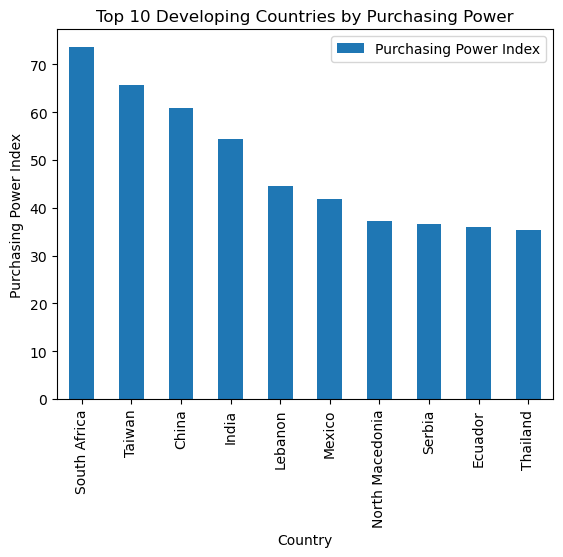

In [35]:
# Filter the data to include only developing countries
developing_countries = demographic_developed[demographic_developed['Development Status'] == 'Developing']

# Sort the data by Quality of Life Index and get the top 10 countries
top_10 = developing_countries.sort_values('Purchasing Power Index', ascending=False).head(10)

# Create a bar chart
top_10.plot.bar(x='Country (or dependency)', y='Purchasing Power Index')

# Add title and axis labels
plt.title('Top 10 Developing Countries by Purchasing Power')
plt.xlabel('Country')
plt.ylabel('Purchasing Power Index')

# Display the plot
plt.show()

As shown in the chart, South Africa has the highest purchasing power followed by Taiwan, China, India,... This metric indicates that these countries and/or their individuals have the ability to purchase more goods and services compared to those with lower purchasing power. 

## Quality of Life in Top Developing Countries

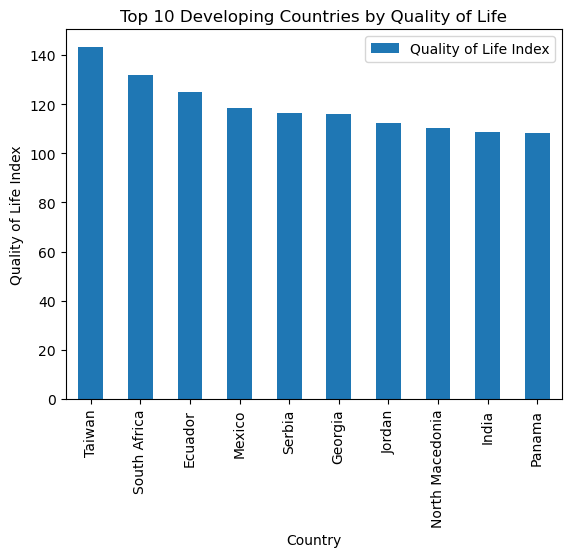

In [36]:
# Filter the data to include only developing countries
developing_countries = demographic_developed[demographic_developed['Development Status'] == 'Developing']

# Sort the data by Quality of Life Index and get the top 10 countries
top_10 = developing_countries.sort_values('Quality of Life Index', ascending=False).head(10)

# Create a bar chart
top_10.plot.bar(x='Country (or dependency)', y='Quality of Life Index')

# Add title and axis labels
plt.title('Top 10 Developing Countries by Quality of Life')
plt.xlabel('Country')
plt.ylabel('Quality of Life Index')

# Display the plot
plt.show()

Taiwan looks to be a developing country with the best quality of life in the graph above, followed by South Africa and other countries. Countries with a high standard of living suggest that their people are able to live satisfying lives, with access to a variety of resources, services, and opportunities to support their physical, mental, and social well-being.

## Cost of Living in Top Developing Countries

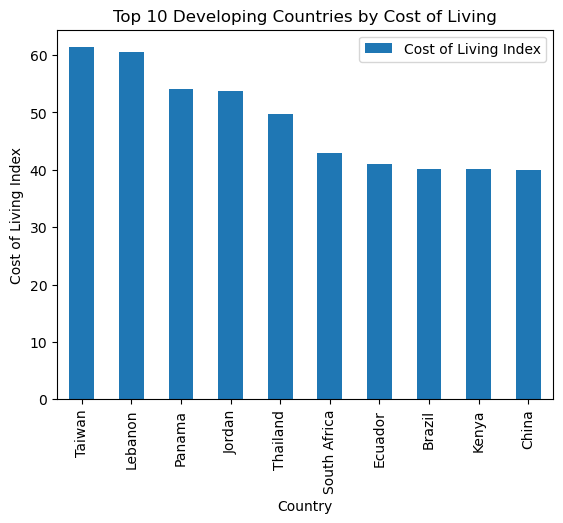

In [37]:
# Filter the data to include only developing countries
developing_countries = demographic_developed[demographic_developed['Development Status'] == 'Developing']

# Sort the data by Quality of Life Index and get the top 10 countries
top_10 = developing_countries.sort_values('Cost of Living Index', ascending=False).head(10)

# Create a bar chart
top_10.plot.bar(x='Country (or dependency)', y='Cost of Living Index')

# Add title and axis labels
plt.title('Top 10 Developing Countries by Cost of Living')
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')

# Display the plot
plt.show()

Cost of living is somewhat related to quality of life. Countries having high quality of life usually associates with high cost of living. Taiwan appears to have the highest quality of life and highest cost of living from the graphs obtained above.

## Health Care vs Quality of Life in Top Developing Countries

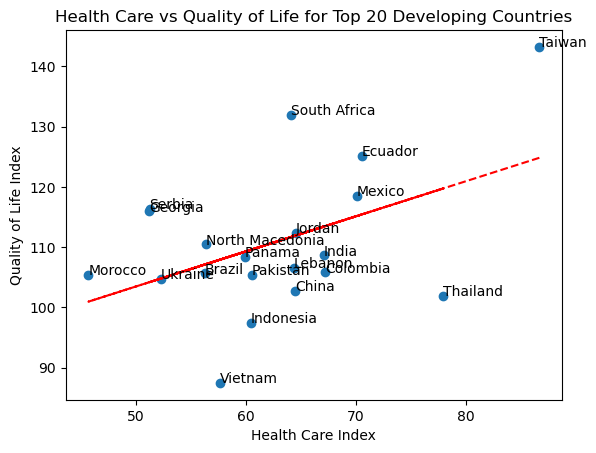

In [39]:
# Filter the data to include only developing countries
healthcare_lifequality = demographic_developed[demographic_developed['Development Status'] == 'Developing']

# Sort the data by Quality of Life Index and get the top 20 countries
top_20 = healthcare_lifequality.sort_values('Quality of Life Index', ascending=False).head(20)

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(top_20['Health Care Index'], top_20['Quality of Life Index'])

# Add trendline
z = np.polyfit(top_20['Health Care Index'], top_20['Quality of Life Index'], 1)
p = np.poly1d(z)
ax.plot(top_20['Health Care Index'], p(top_20['Health Care Index']), 'r--')

# Add annotations for each country
for i, row in top_20.iterrows():
    ax.annotate(row['Country (or dependency)'], (row['Health Care Index'], row['Quality of Life Index']))

# Add title and axis labels
plt.title('Health Care vs Quality of Life for Top 20 Developing Countries')
plt.xlabel('Health Care Index')
plt.ylabel('Quality of Life Index')

# Display the plot
plt.show()

In this graph, Taiwan has the highest health care index with highest quality of life which indicates a very good wellness of an individual in terms of living and maintain a healthy lifestyle. Thailand also has good health care index, however, the quality of life is low compared to other developing countries. 

## Health Care vs Cost of Living in Top Developing Countries

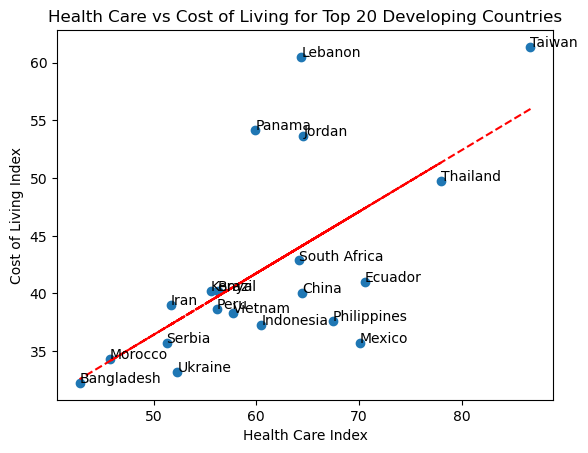

In [40]:
# Filter the data to include only developing countries
healthcare_livingcost = demographic_developed[demographic_developed['Development Status'] == 'Developing']

# Sort the data by Quality of Life Index and get the top 20 countries
top_20 = healthcare_livingcost.sort_values('Cost of Living Index', ascending=False).head(20)

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(top_20['Health Care Index'], top_20['Cost of Living Index'])

# Add trendline
z = np.polyfit(top_20['Health Care Index'], top_20['Cost of Living Index'], 1)
p = np.poly1d(z)
ax.plot(top_20['Health Care Index'], p(top_20['Health Care Index']), 'r--')

# Add annotations for each country
for i, row in top_20.iterrows():
    ax.annotate(row['Country (or dependency)'], (row['Health Care Index'], row['Cost of Living Index']))

# Add title and axis labels
plt.title('Health Care vs Cost of Living for Top 20 Developing Countries')
plt.xlabel('Health Care Index')
plt.ylabel('Cost of Living Index')

# Display the plot
plt.show()

Taiwan has highest cost of living as well as health care index. Thailand follows the trend line closely with proportionate cost of living and health care index. 